In [185]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import IPython as display

In [186]:

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='StudentsPerformance'
)

In [187]:

# Create a cursor object
my_cursor = conn.cursor()

# Execute the query to retrieve data from the StudentsPerformance table
my_cursor.execute("SELECT * FROM studentsperformance")

# Get the column names
column_names = [column[0] for column in my_cursor.description]

# Fetch all rows from the executed query
rows = my_cursor.fetchall()

In [188]:
data = pd.DataFrame(rows, columns=column_names)
    
# Display the first few rows of the dataframe with centered headers and cells
styled_df = data.head(10).style.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
styled_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [190]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


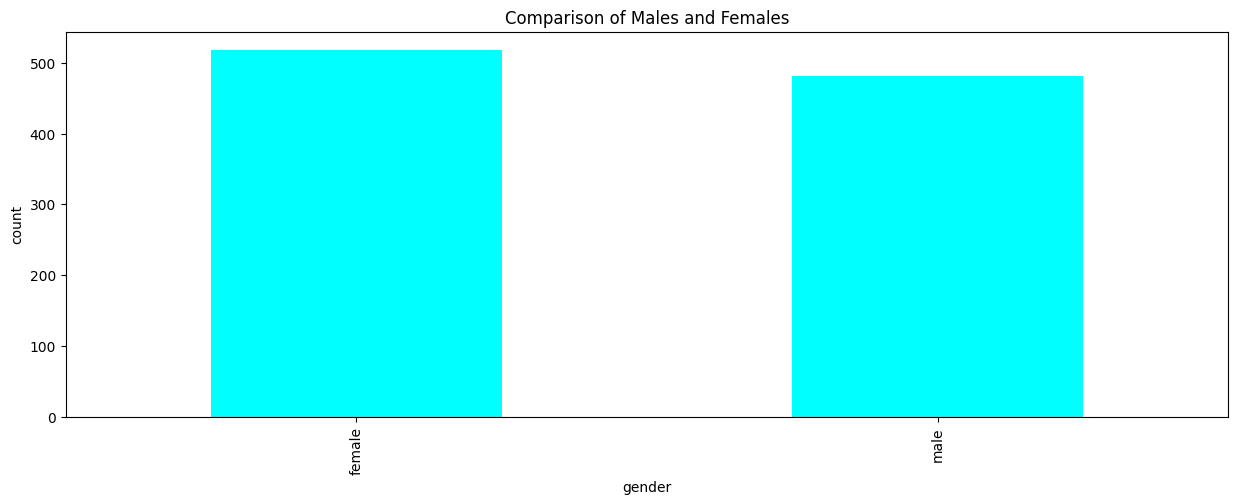

In [191]:
# visualising the number of male and female in the dataset
plt.subplots(figsize=(15,5))
data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [192]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

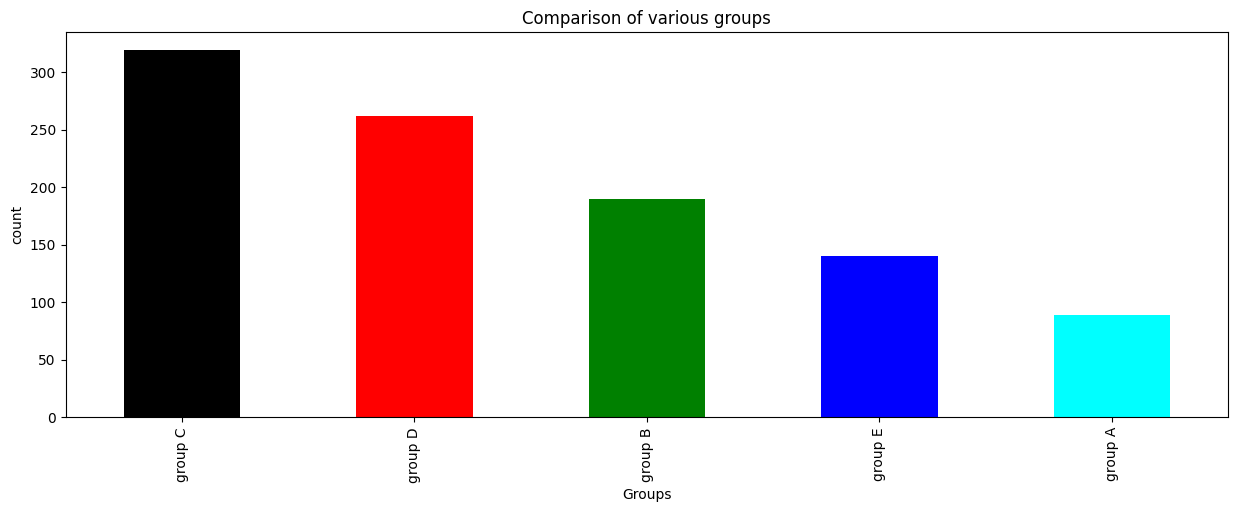

In [193]:
# visualizing the different groups in the dataset
plt.subplots(figsize=(15,5))
data['race/ethnicity'].value_counts(normalize = True)
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

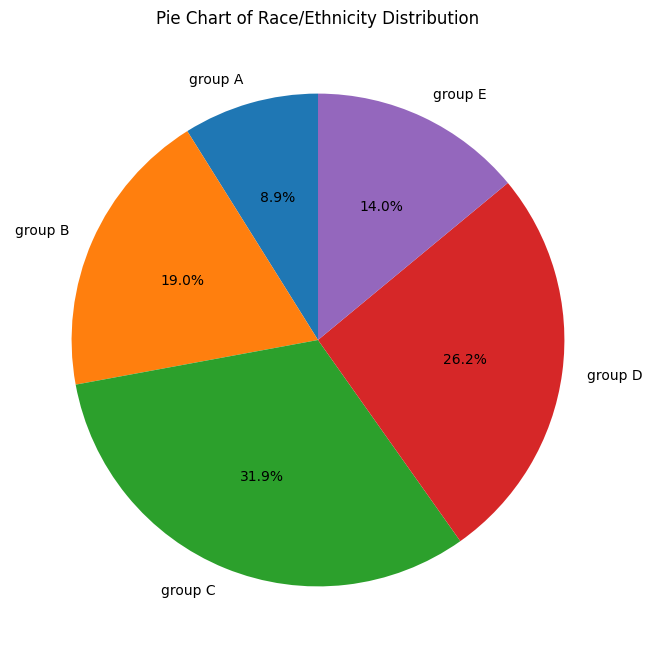

In [194]:
# Prepare Data
df = data.groupby('race/ethnicity').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8), autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Race/Ethnicity Distribution")
plt.ylabel("")  # Remove the y-label
plt.show()

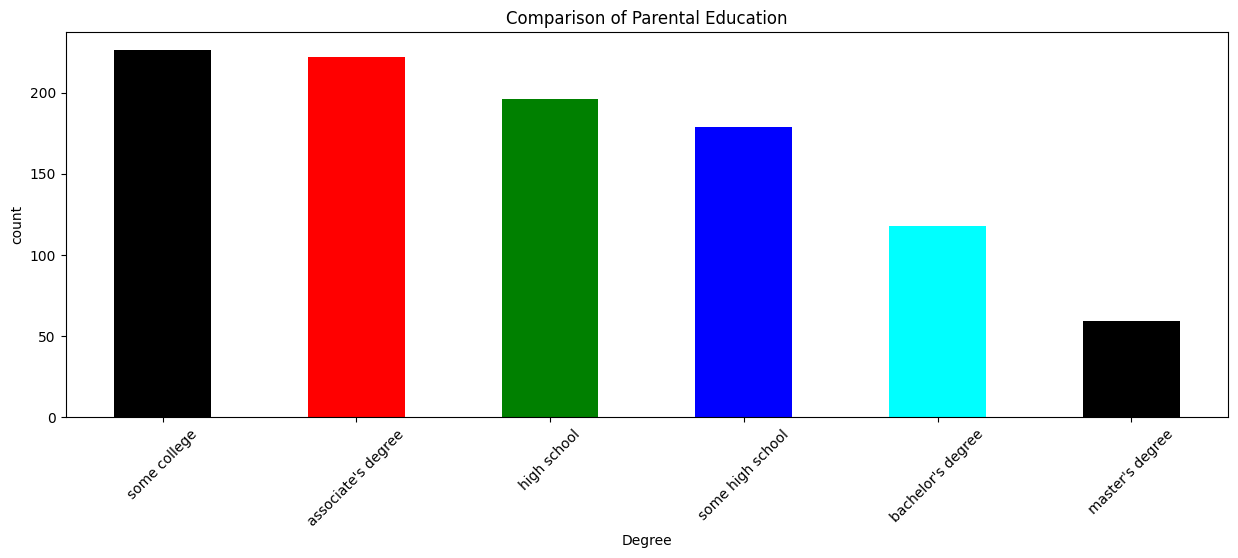

In [195]:
# visualizing the differnt parental education levels
plt.subplots(figsize=(15,5))
data['parental_level_of_education'].value_counts(normalize = True)
data['parental_level_of_education'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

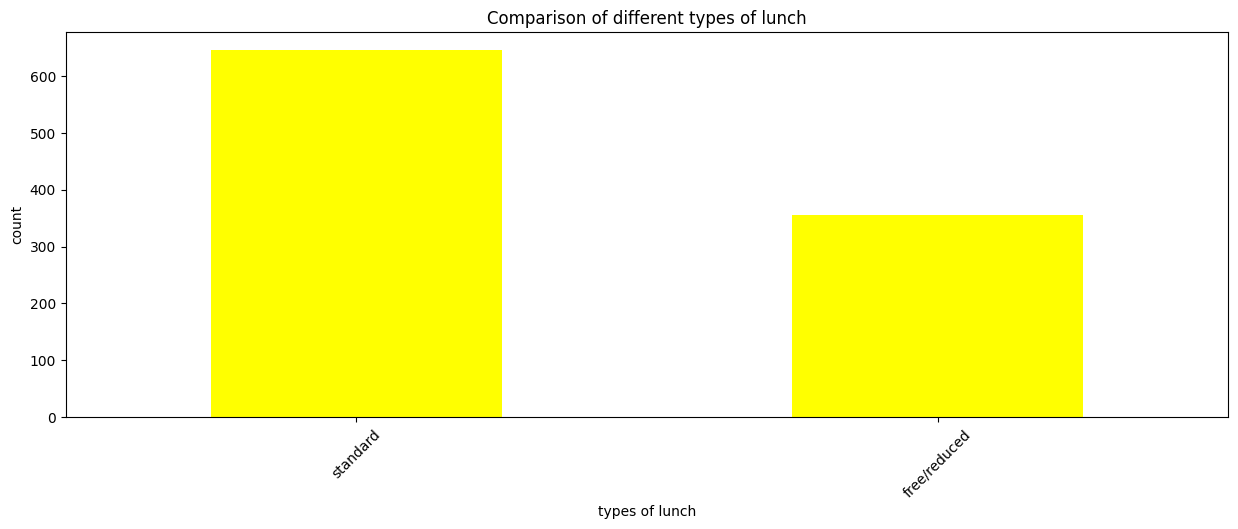

In [196]:
# visualizing different types of lunch 
plt.subplots(figsize=(15,5))
data['lunch'].value_counts(normalize = True)
data['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

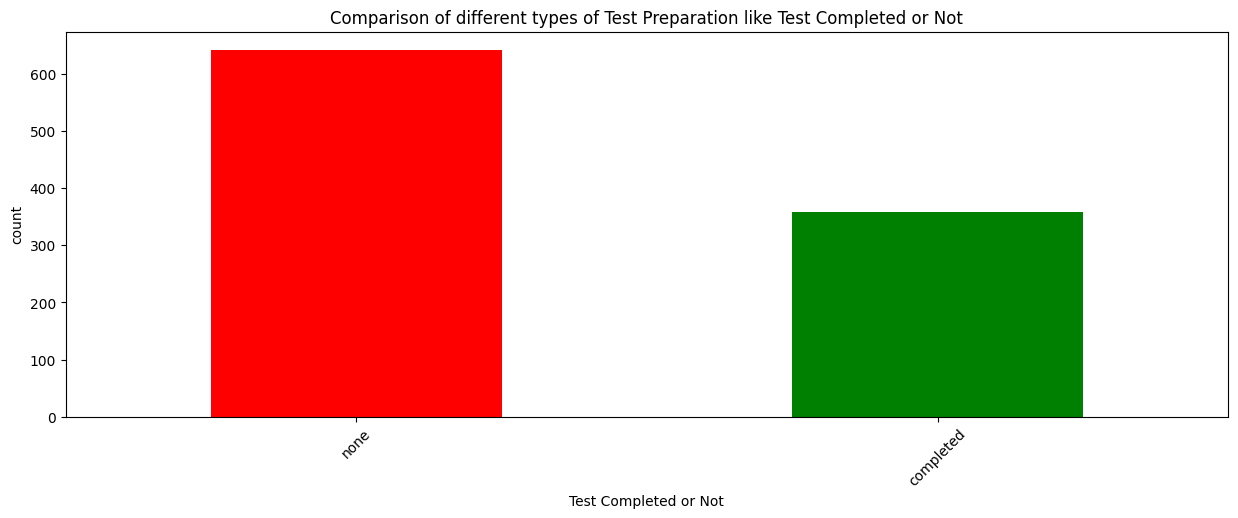

In [197]:
# visualizing different types of lunch 
plt.subplots(figsize=(15,5))
data['test_preparation_course'].value_counts(normalize = True)
data['test_preparation_course'].value_counts(dropna = False).plot.bar(color = ['red', 'green'])
plt.title('Comparison of different types of Test Preparation like Test Completed or Not')
plt.xlabel('Test Completed or Not')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

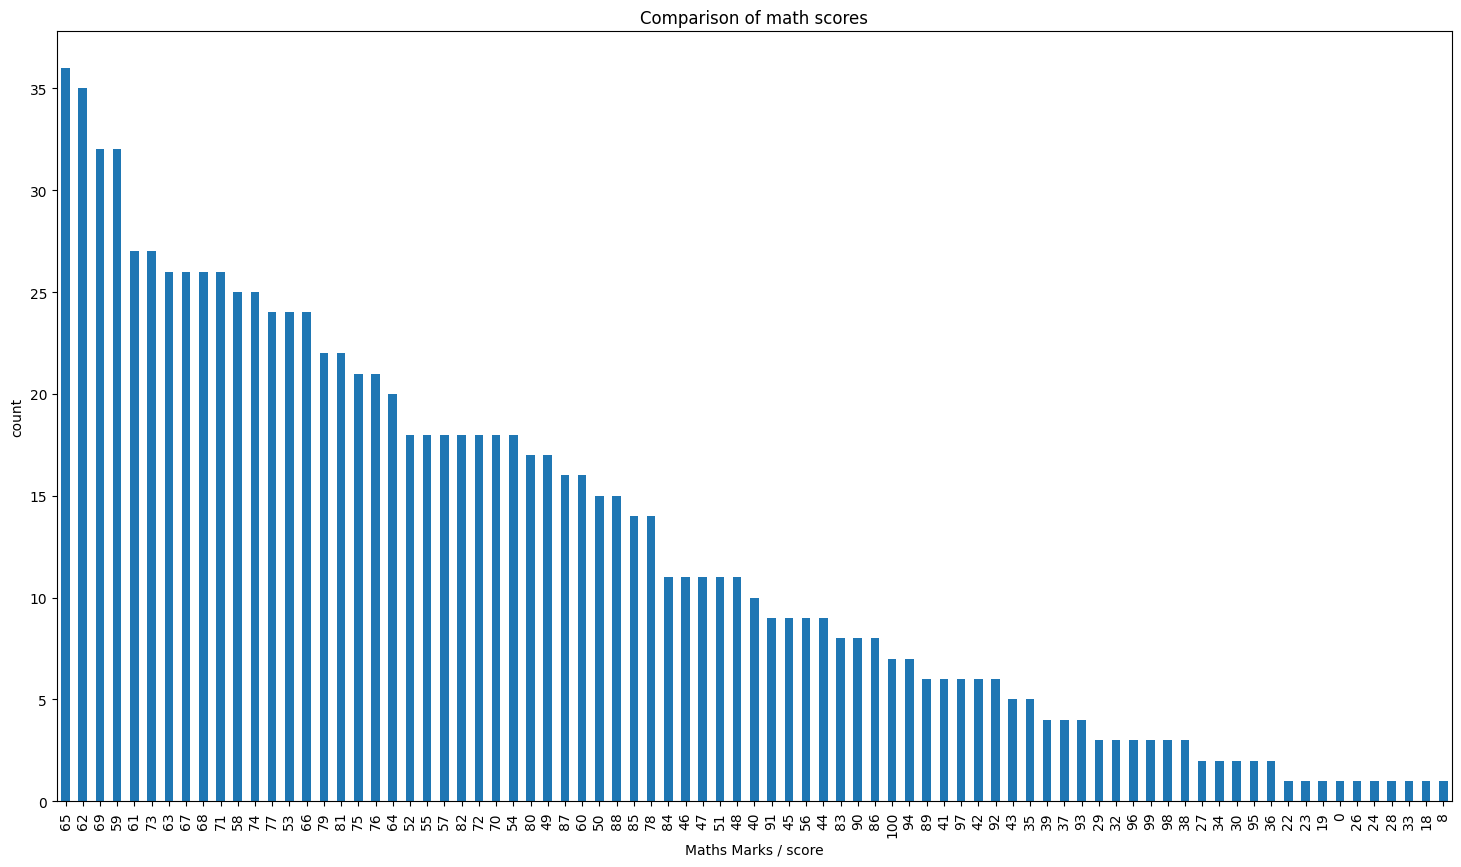

In [198]:
# visualizing maths score
plt.subplots(figsize=(15,5))
data['math_score'].value_counts(normalize = True)
data['math_score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('Maths Marks / score')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

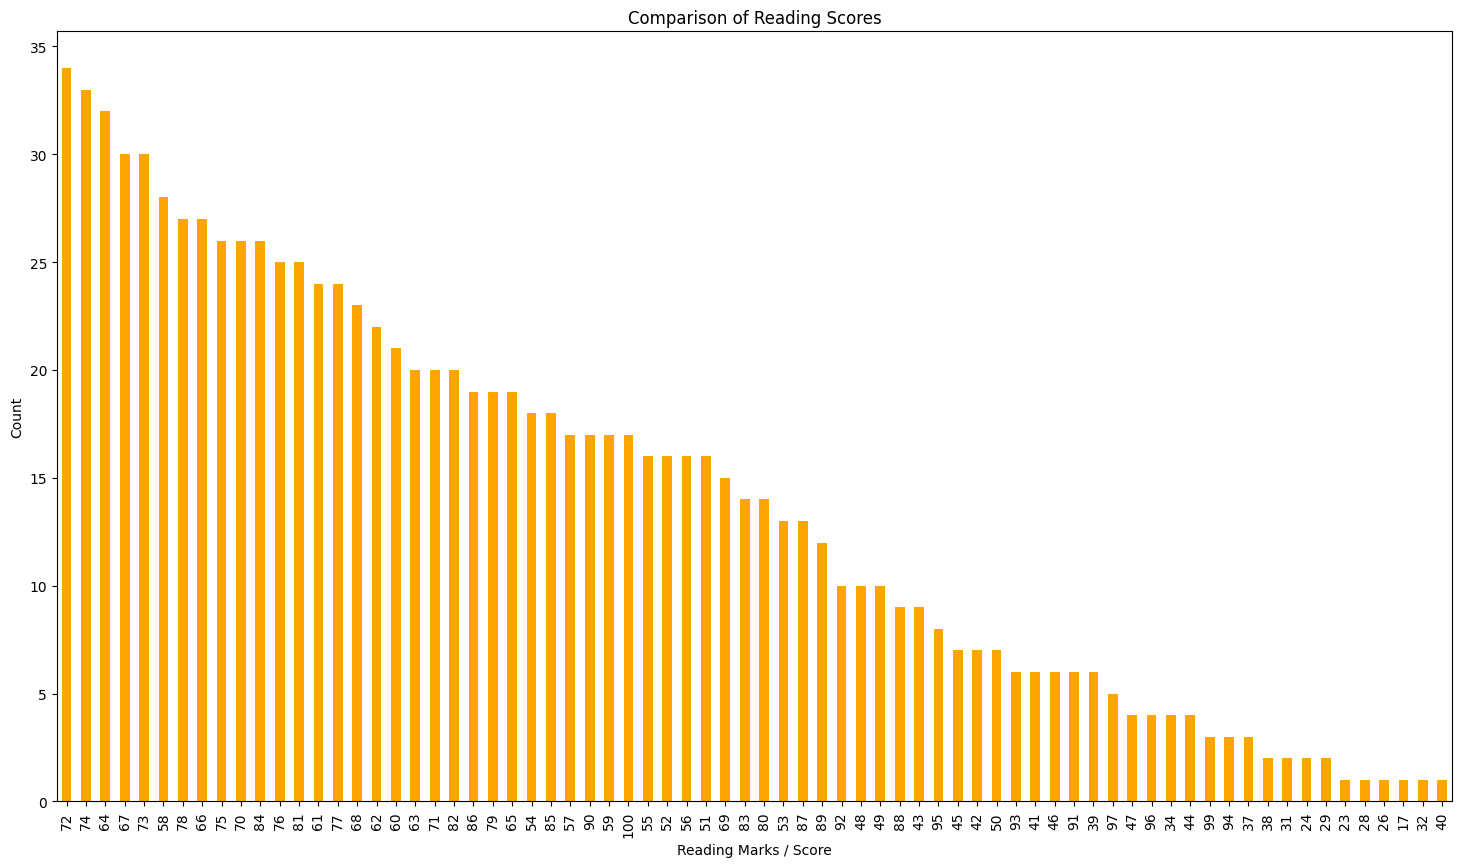

In [199]:
# visualizing reading score score
plt.subplots(figsize=(15,5))
data['reading_score'].value_counts(normalize = True)
data['reading_score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of Reading Scores')
plt.xlabel('Reading Marks / Score')
plt.ylabel('Count')
plt.show()

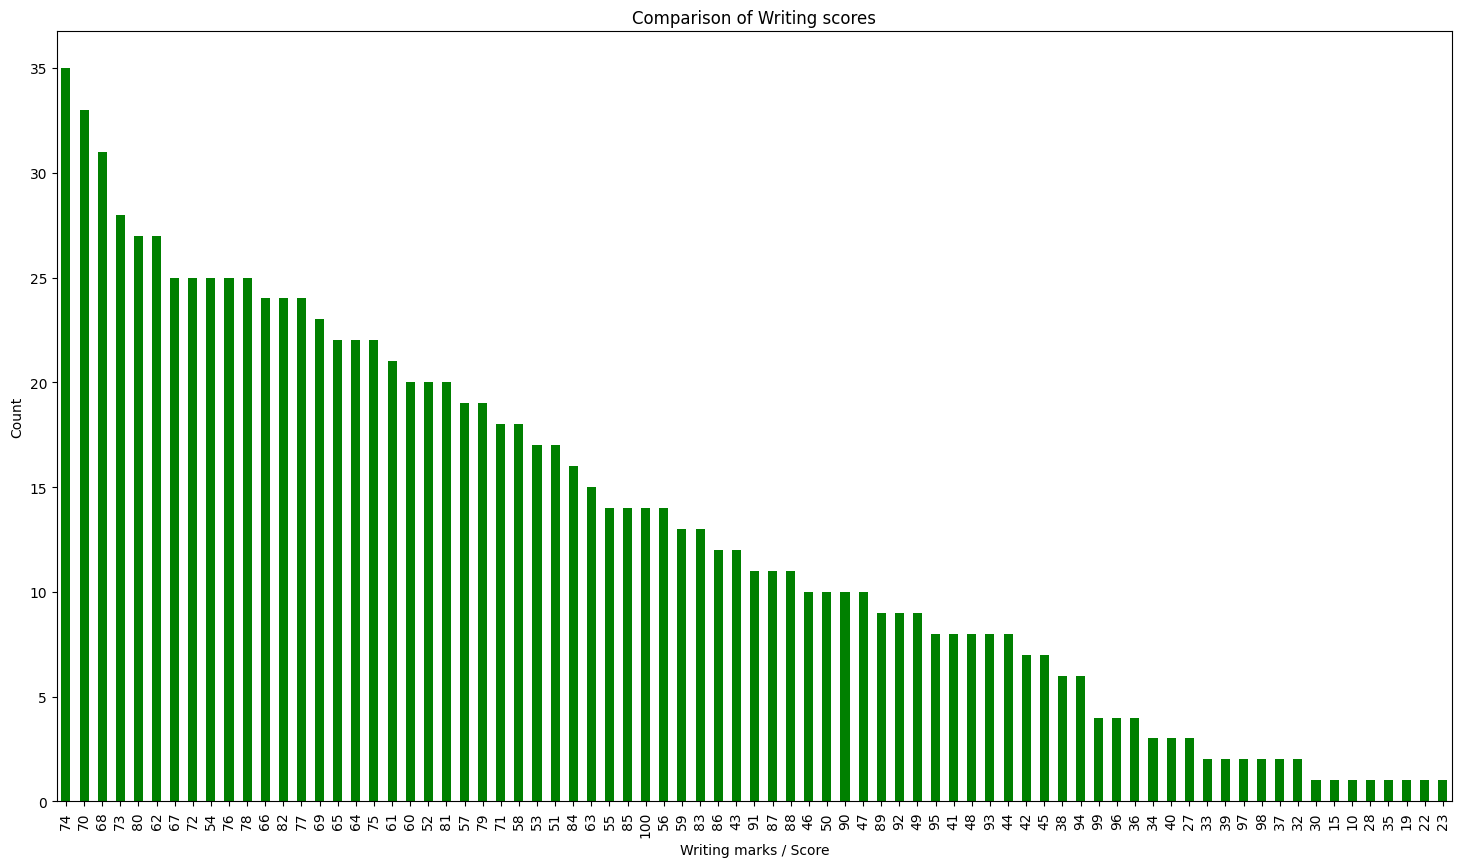

In [200]:
# visualizing writing score
plt.subplots(figsize=(15,5))
data['writing_score'].value_counts(normalize = True)
data['writing_score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'green')
plt.title('Comparison of Writing scores')
plt.xlabel('Writing marks / Score')
plt.ylabel('Count')
plt.show()

# <font color='purple'> Detecting Outliers </font>

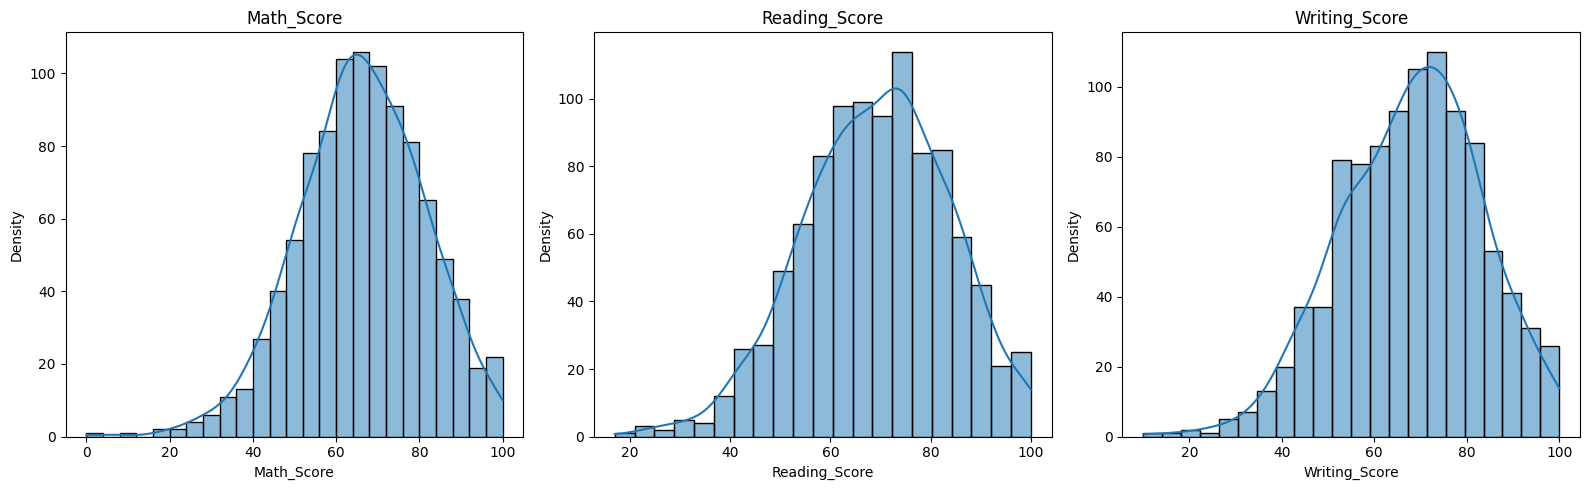

In [201]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Math Score
sns.histplot(data['math_score'], kde=True, ax=axes[0])
axes[0].set_title('Math_Score')
axes[0].set_xlabel('Math_Score')
axes[0].set_ylabel('Density')

# Reading Score
sns.histplot(data['reading_score'], kde=True, ax=axes[1])
axes[1].set_title('Reading_Score')
axes[1].set_xlabel('Reading_Score')
axes[1].set_ylabel('Density')

# Writing Score
sns.histplot(data['writing_score'], kde=True, ax=axes[2])
axes[2].set_title('Writing_Score')
axes[2].set_xlabel('Writing_Score')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

- It is very much clear, that there is no skewness in the Target Columns,

**Lets check the Inference**

In [202]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= data['math_score'], size=100)

# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Math Scores:", data['math_score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= data['reading_score'], size=100)

# getting the sample mean
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          

# getting the population mean
print("Population mean for Reading Scores:", data['reading_score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a= data['writing_score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", data['writing_score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


**Let check the Confidence Interval for Math Score**

In [203]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['math_score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['math_score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math_score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


**Let check the Confidence Interval for Reading Score**

In [204]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['reading_score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['reading_score'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading_score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.75757337011645, 69.27642662988355)
True mean: 69.169


**Let check the Confidence Interval for Writing Score**

In [205]:
# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['writing_score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['writing_score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing_score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.59660035030862, 69.17739964969138)
True mean: 68.054


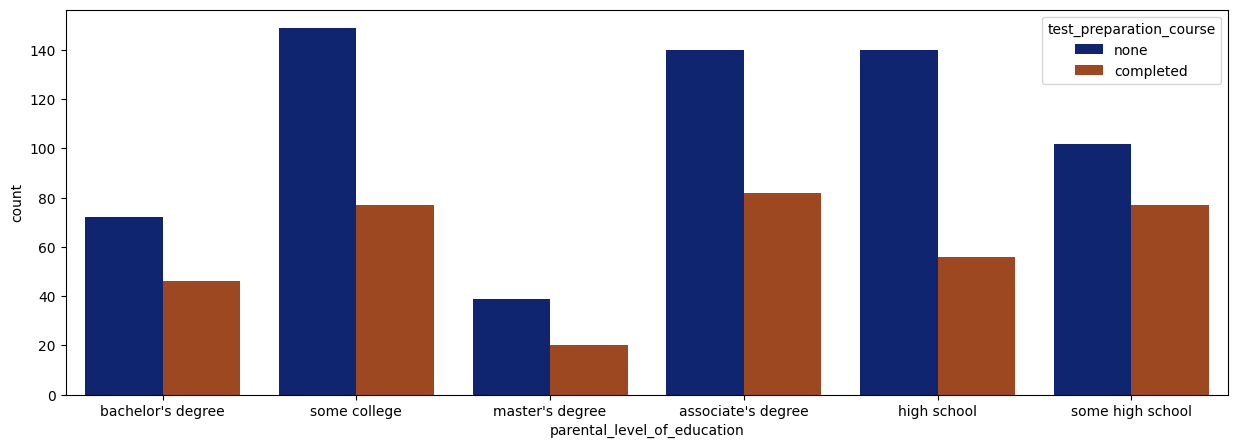

In [206]:
# comparison of parental degree and test course
plt.subplots(figsize=(15,5))
sns.countplot(x = 'parental_level_of_education', data = data, hue = 'test_preparation_course', palette = 'dark')
plt.show()

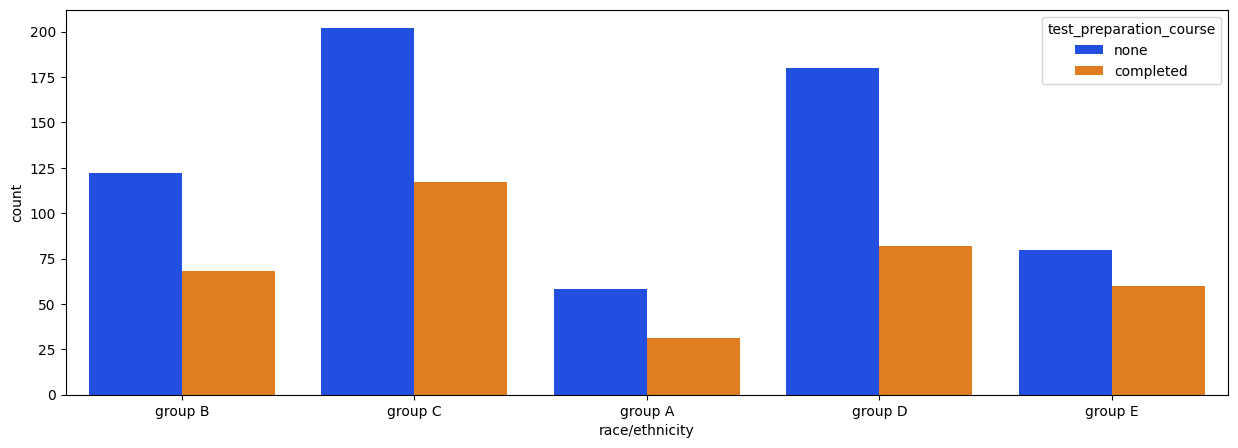

In [207]:
# comparison of race/ethnicity and test preparation course
plt.subplots(figsize=(15,5))
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test_preparation_course', palette = 'bright')
plt.show()


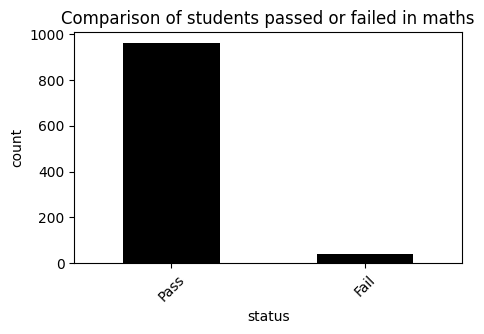

In [208]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
plt.subplots(figsize=(15,8))
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math_score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.xticks(rotation =45)
plt.show()

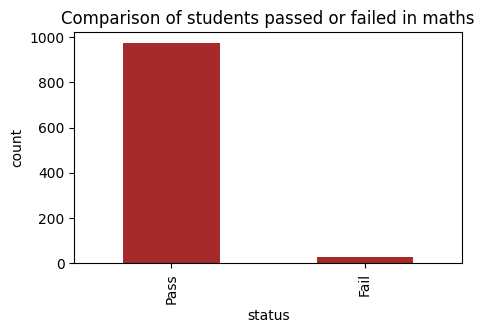

In [209]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_reading'] = np.where(data['reading_score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

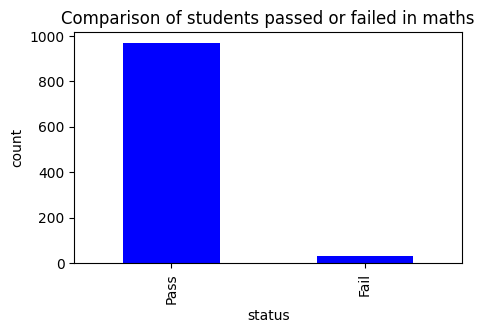

In [210]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_writing'] = np.where(data['writing_score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

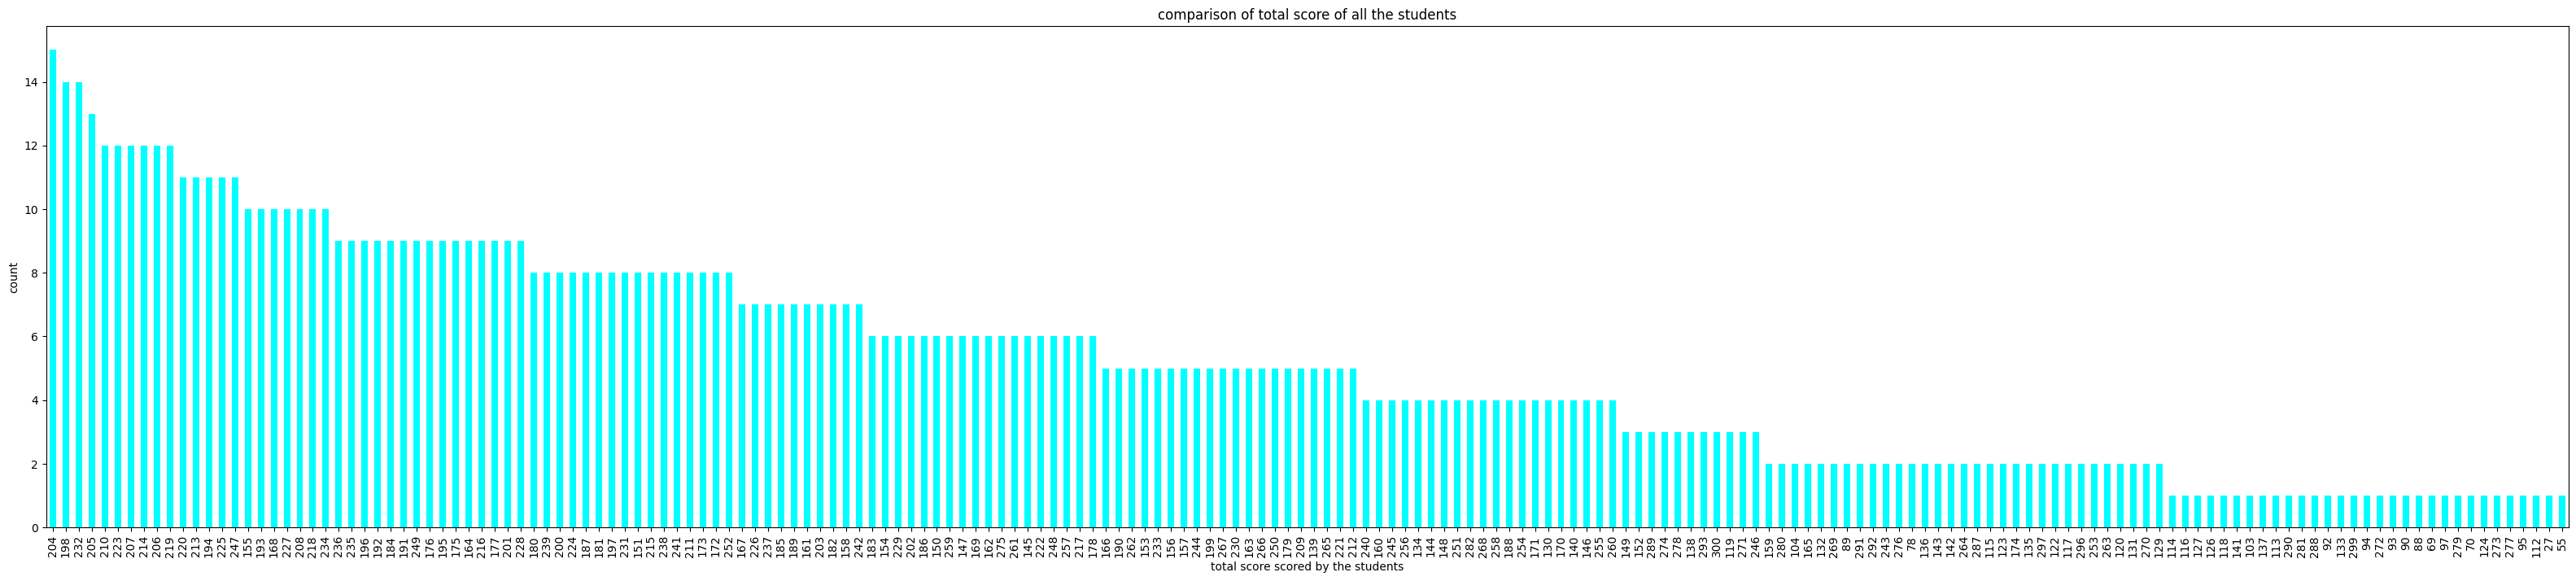

In [211]:
# computing the total score for each student
plt.subplots(figsize=(15,8))
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

data['total_score'].value_counts(normalize = True)
data['total_score'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

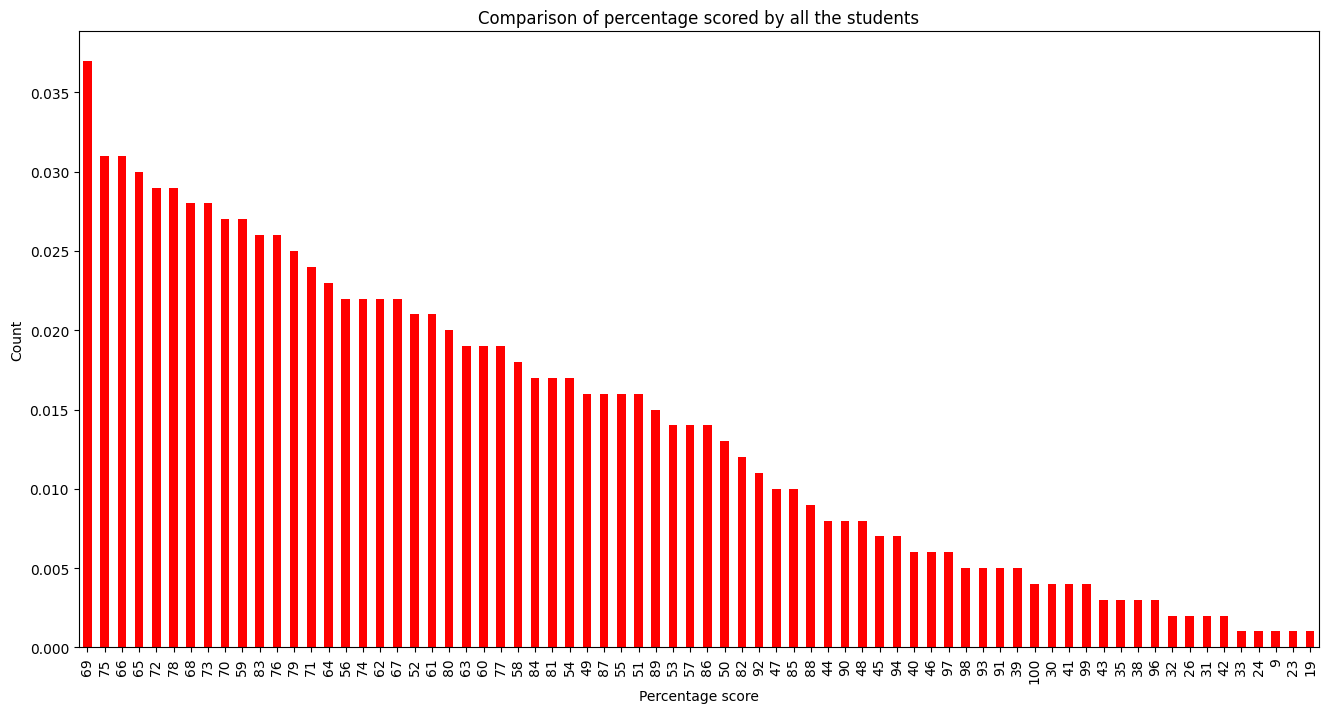

In [212]:
# computing percentage for each of the students
# importing math library to use ceil
from math import * 


# Compute percentage for each student
data['percentage'] = data['total_score'] / 3

# Round up percentage using ceil function
data['percentage'] = data['percentage'].apply(ceil)

# Calculate percentage value counts
percentage_counts = data['percentage'].value_counts(normalize=True)

# Plotting the bar chart
plt.figure(figsize=(16, 8))
percentage_counts.plot(kind='bar', color='red')

plt.title('Comparison of percentage scored by all the students')
plt.xlabel('Percentage score')
plt.ylabel('Count')
plt.show()

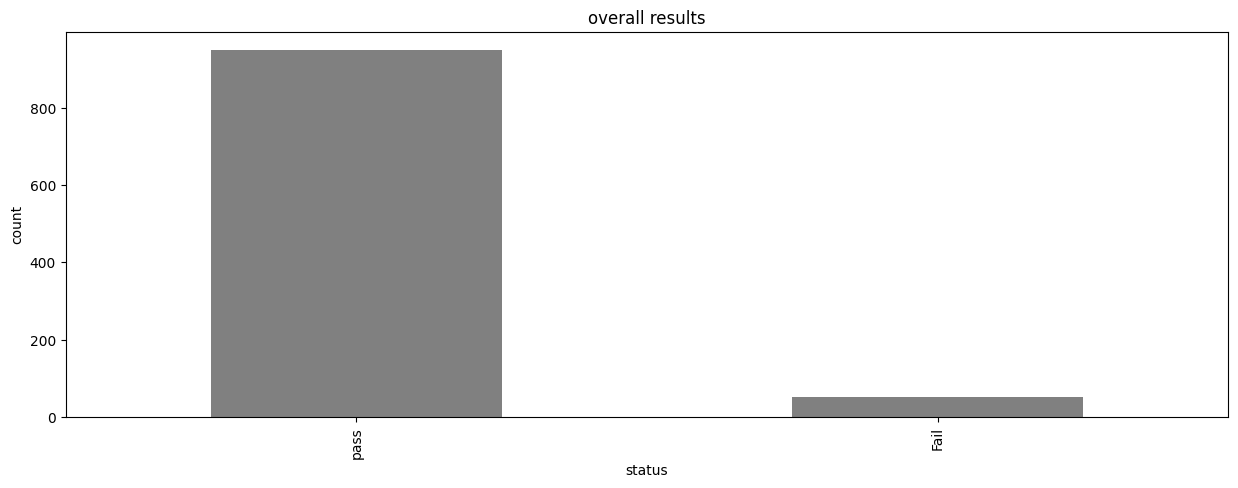

In [213]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (15, 5))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

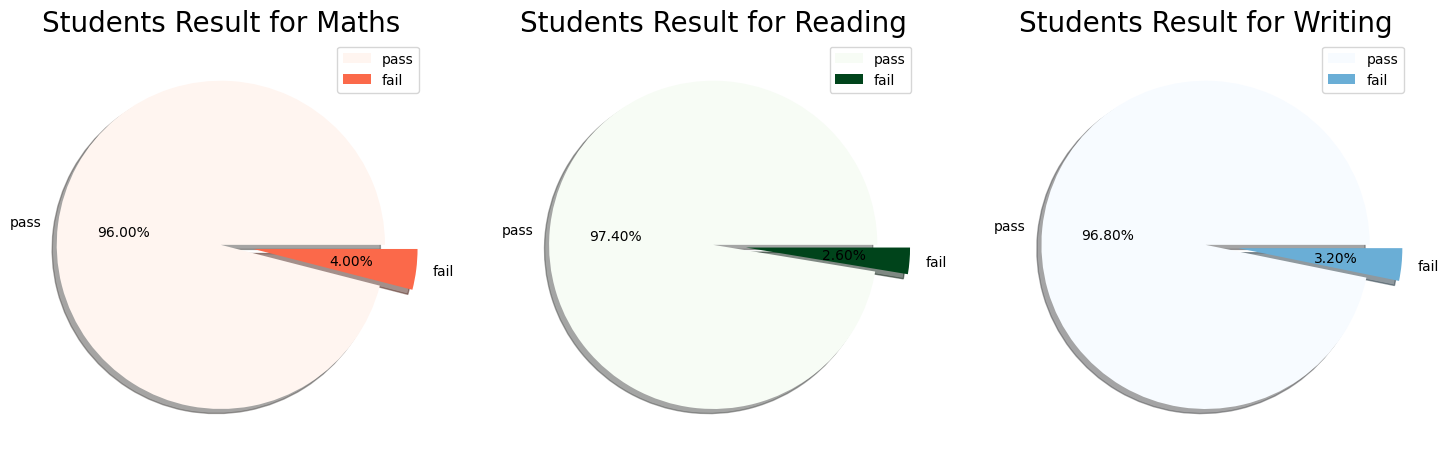

In [214]:
# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
plt.rcParams['figure.figsize'] = (18, 12)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math_score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading_score']< passmarks, 'Fail', 'Pass')
data['pass_writing'] = np.where(data['writing_score']< passmarks, 'Fail', 'Pass')

# pie chart to represent the ratio of pass and fail status between the students

size = data['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = data['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = data['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()

In [215]:
# Assigning grades to the grades according to the following criteria :
# 0  - 49 marks : grade F
# 50 - 59 marks : grade E
# 60 - 69 marks : grade D
# 70 - 79 marks : grade C
# 80 - 89 marks : grade B
# 90 - 100 marks : grade A

def getgrade(percentage, status):
    if status == 'Fail':
        return 'F'
    elif percentage >= 90:
        return 'A'
    elif percentage >= 80:
        return 'B'
    elif percentage >= 70:
        return 'C'
    elif percentage >= 60:
        return 'D'
    elif percentage >= 50:
        return 'E'
    else:
        return 'F'


data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

grades
C    260
D    252
E    173
B    156
F    101
A     58
Name: count, dtype: int64

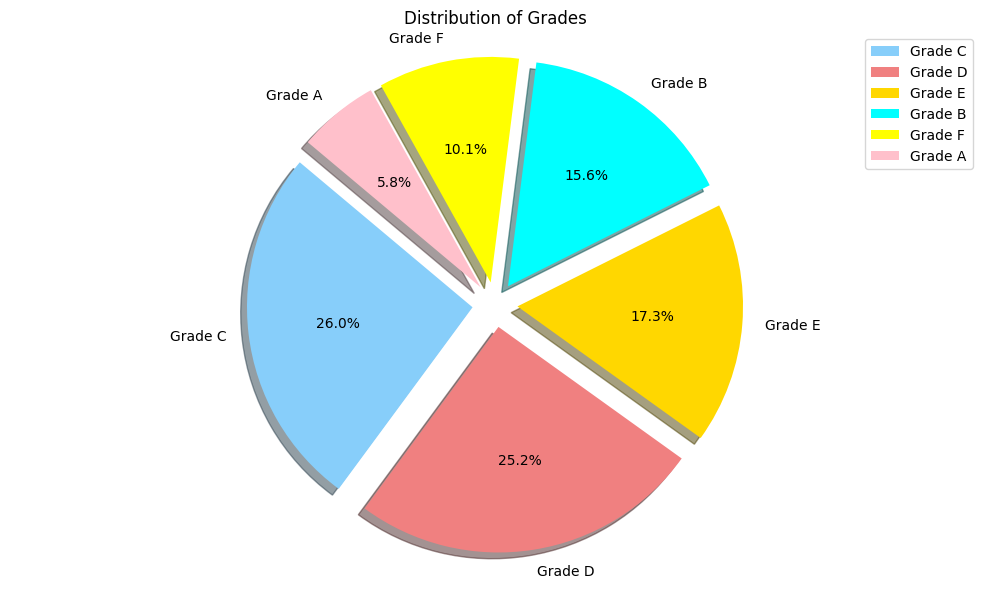

In [216]:
import matplotlib.pyplot as plt

# Example data based on your result
labels = ['Grade C', 'Grade D', 'Grade E', 'Grade B', 'Grade F', 'Grade A']
sizes = [260, 252, 173, 156, 101, 58]  # Counts based on your result
colors = ['lightskyblue', 'lightcoral', 'gold', 'cyan', 'yellow', 'pink']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Explode all slices for emphasis

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Grades')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(patches, labels, loc="best")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


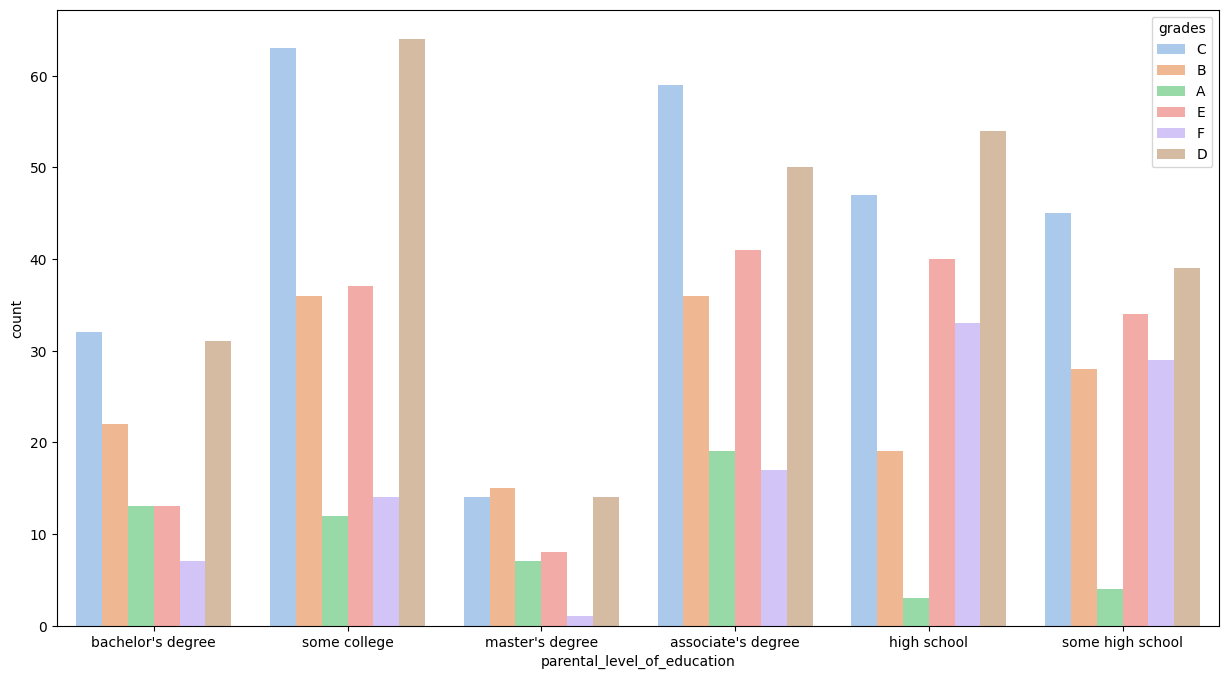

In [217]:
# for better visualization we will plot it again using seaborn
plt.subplots(figsize=(15,8))
sns.countplot(x = data['parental_level_of_education'], data = data, hue = data['grades'], palette = 'pastel')
plt.show()

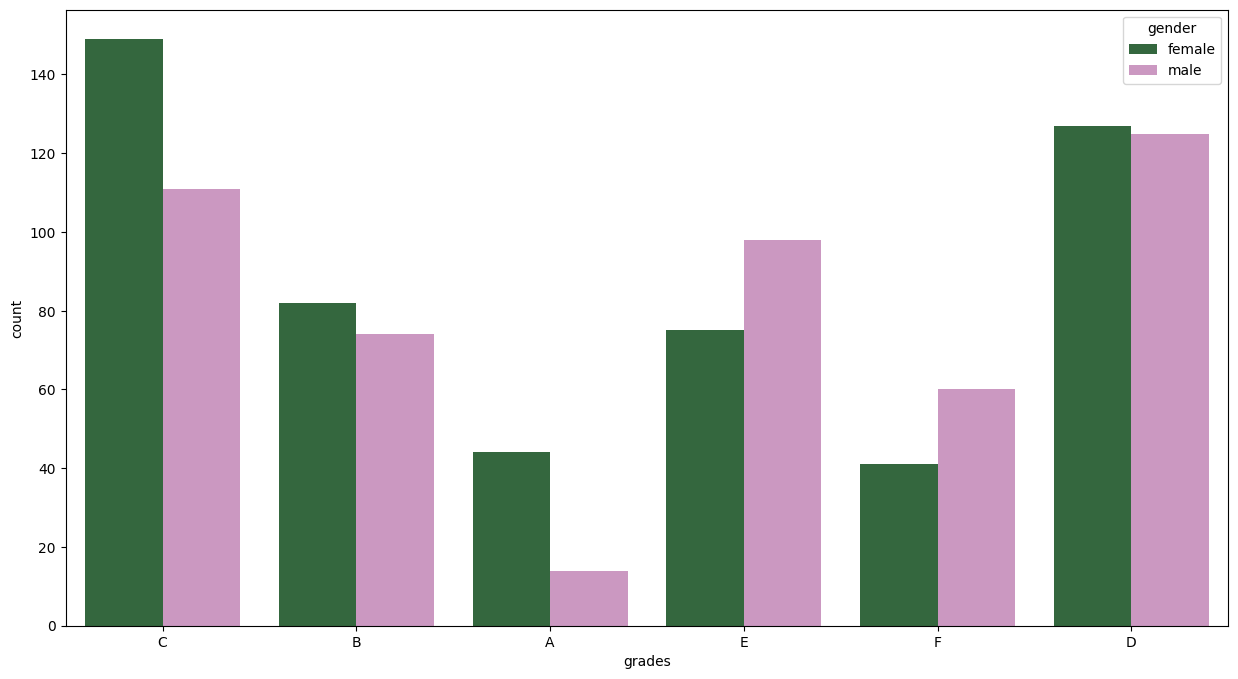

In [218]:
# comparing the distribution of grades among males and females
plt.subplots(figsize=(15,8))
sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

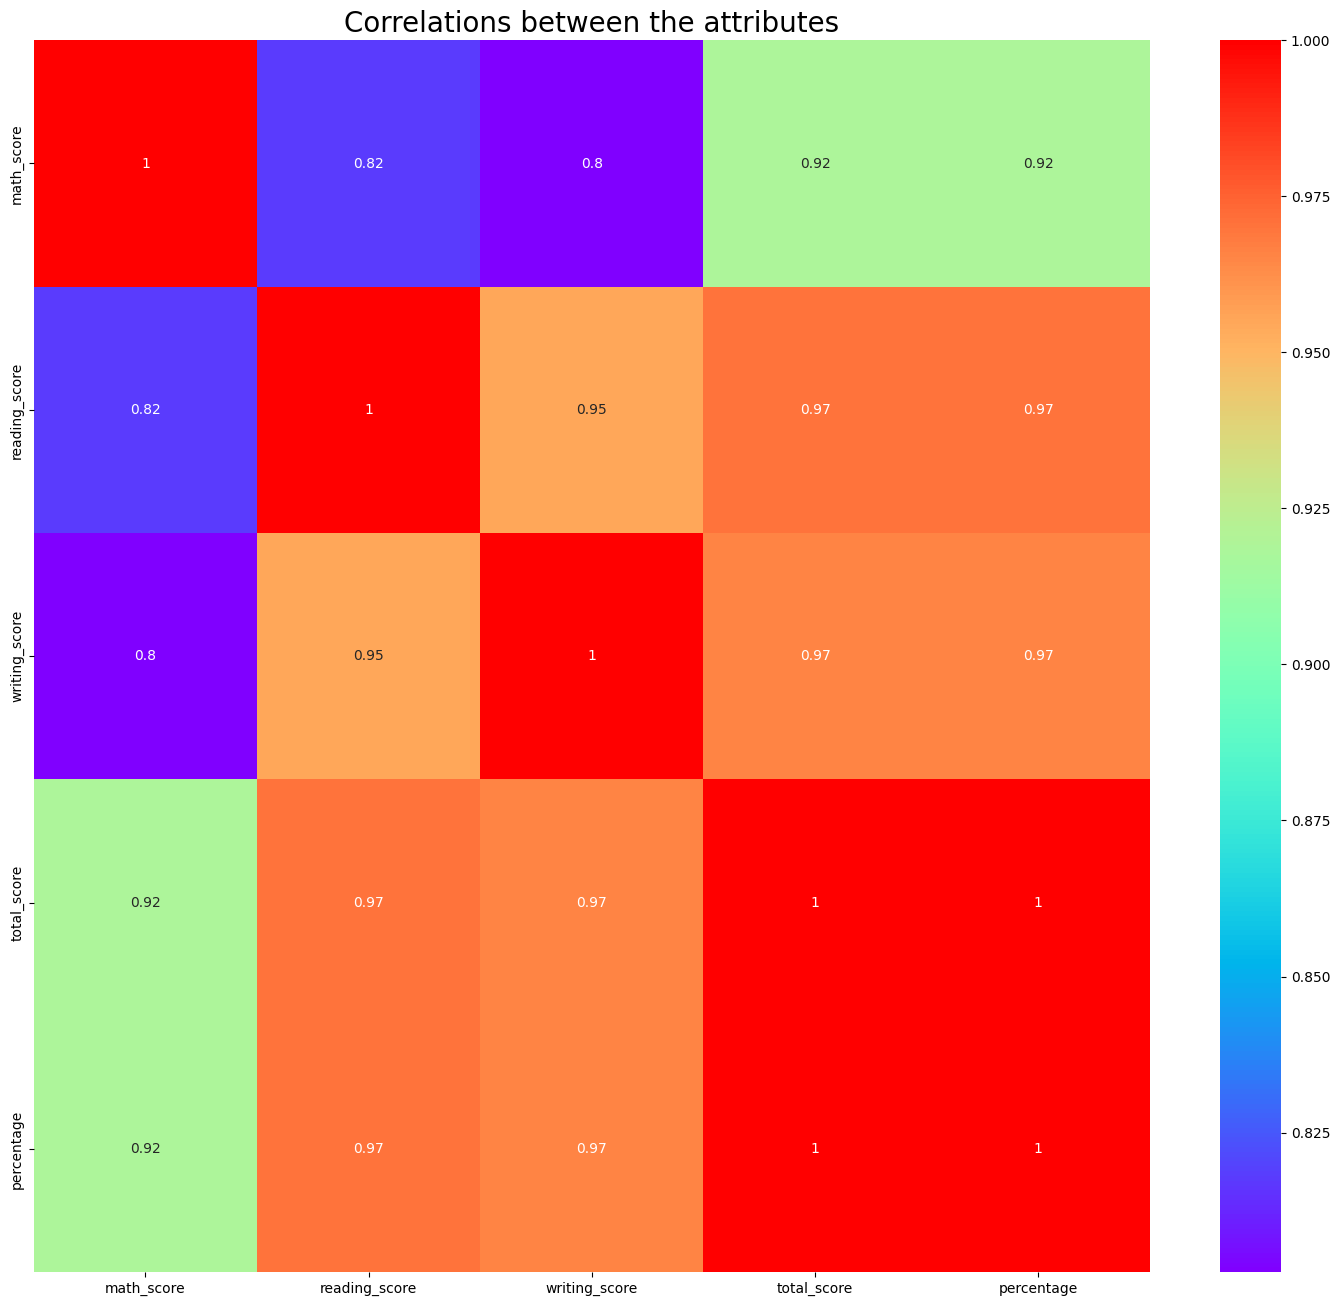

In [219]:
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns

plt.rcParams['figure.figsize'] = (18, 16)
sns.heatmap(numeric_data.corr(), cmap='rainbow', annot=True)
plt.title('Correlations between the attributes', fontsize=20)
plt.show()

In [220]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73,pass,C
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83,pass,B
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93,pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50,pass,E
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77,pass,C


In [221]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print(data.columns)


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'pass_math', 'pass_reading', 'pass_writing',
       'total_score', 'percentage', 'status', 'grades'],
      dtype='object')


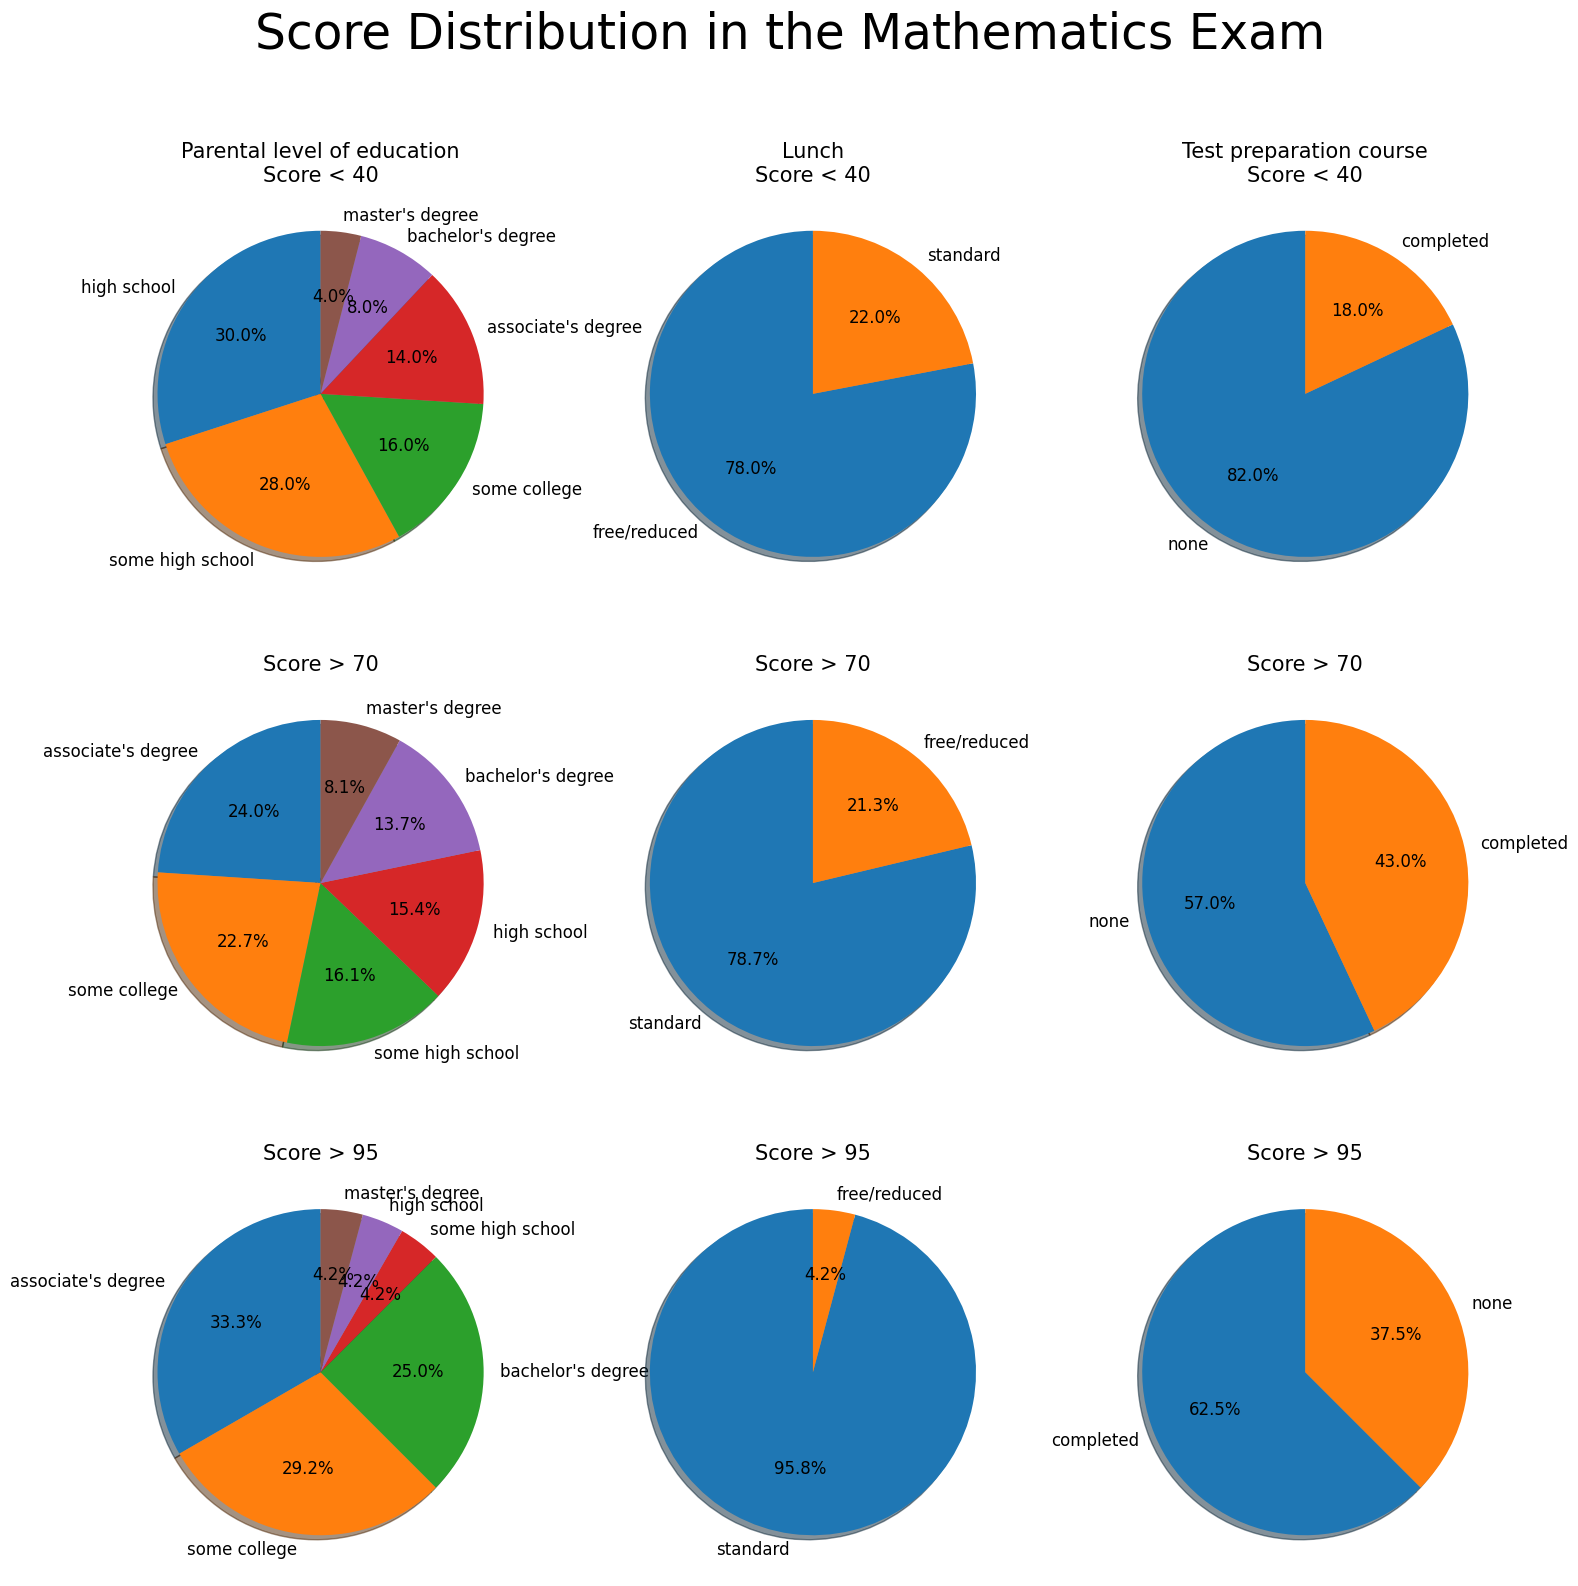

In [222]:
plt.figure(figsize=(18, 18))
plt.suptitle("Score Distribution in the Mathematics Exam", fontsize=35)

# Parental level of education
plt.subplot(3, 3, 1)
EBV1 = data[data["math_score"] <= 40]["parental_level_of_education"].value_counts()
EBV1_pie = plt.pie(EBV1, labels=EBV1.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Parental level of education\nScore < 40", fontsize=15)

plt.subplot(3, 3, 4)
EBV2 = data[data["math_score"] >= 70]["parental_level_of_education"].value_counts()
EBV2_pie = plt.pie(EBV2, labels=EBV2.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Score > 70", fontsize=15)

plt.subplot(3, 3, 7)
EBV3 = data[data["math_score"] >= 95]["parental_level_of_education"].value_counts()
EBV3_pie = plt.pie(EBV3, labels=EBV3.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Score > 95", fontsize=15)

# Lunch
plt.subplot(3, 3, 2)
EBV1 = data[data["math_score"] <= 40]["lunch"].value_counts()
EBV1_pie = plt.pie(EBV1, labels=EBV1.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Lunch\nScore < 40", fontsize=15)

plt.subplot(3, 3, 5)
EBV2 = data[data["math_score"] >= 70]["lunch"].value_counts()
EBV2_pie = plt.pie(EBV2, labels=EBV2.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Score > 70", fontsize=15)

plt.subplot(3, 3, 8)
EBV3 = data[data["math_score"] >= 95]["lunch"].value_counts()
EBV3_pie = plt.pie(EBV3, labels=EBV3.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Score > 95", fontsize=15)

# Test preparation course
plt.subplot(3, 3, 3)
EBV1 = data[data["math_score"] <= 40]["test_preparation_course"].value_counts()
EBV1_pie = plt.pie(EBV1, labels=EBV1.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Test preparation course\nScore < 40", fontsize=15)

plt.subplot(3, 3, 6)
EBV2 = data[data["math_score"] >= 70]["test_preparation_course"].value_counts()
EBV2_pie = plt.pie(EBV2, labels=EBV2.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Score > 70", fontsize=15)

plt.subplot(3, 3, 9)
EBV3 = data[data["math_score"] >= 95]["test_preparation_course"].value_counts()
EBV3_pie = plt.pie(EBV3, labels=EBV3.index, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title("Score > 95", fontsize=15)

plt.show()

# <font color='purple'> Data Preprocessing</font>

In [223]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test_preparation_course'] = le.fit_transform(data['test_preparation_course'])

# label encoding for lunch

data['lunch'] = le.fit_transform(data['lunch'])
le

LabelEncoder()

In [224]:
# label encoding for race/ethnicity
# we have to map values to each of the categories

data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['race/ethnicity'].value_counts()

race/ethnicity
3    319
4    262
2    190
5    140
1     89
Name: count, dtype: int64

In [225]:
# label encoding for parental_level_of_education

data['parental_level_of_education'] = le.fit_transform(data['parental_level_of_education'])
data['parental_level_of_education'].value_counts()

parental_level_of_education
4    226
0    222
2    196
5    179
1    118
3     59
Name: count, dtype: int64

In [226]:
# label encoding for gender

data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading

data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing

data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status

data['status'] = le.fit_transform(data['status'])

In [227]:
# label encoding for grades
# we have to map values to each of the categories

data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)
data['grades'] = data['grades'].replace('F', 6)

data['grades'].value_counts()

grades
3    260
4    252
5    173
2    156
6    101
1     58
Name: count, dtype: int64

In [228]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [229]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [230]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# <font color='purple'> Modeling </font>

In [231]:
import nbformat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [232]:
data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,0,2,1,1,1,72,72,74,1,1,1,218,73,1,3
1,0,3,4,1,0,69,90,88,1,1,1,247,83,1,2
2,0,2,3,1,1,90,95,93,1,1,1,278,93,1,1
3,1,1,0,0,1,47,57,44,1,1,1,148,50,1,5
4,1,3,4,1,1,76,78,75,1,1,1,229,77,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,1,1,1,282,94,1,1
996,1,3,2,0,1,62,55,55,1,1,1,172,58,1,5
997,0,3,2,0,0,59,71,65,1,1,1,195,65,1,4
998,0,4,4,1,0,68,78,77,1,1,1,223,75,1,3


In [233]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state =42)

In [234]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

X_trf = knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [235]:
accuracy_score(y_pred,y_test)

0.97

In [236]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [237]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.42


In [238]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head(10)

,Actual Value,Predicted Value,Difference
521,2,1.758282,0.241718
737,4,4.029620,-0.029620
740,3,3.028842,-0.028842
660,3,3.010943,-0.010943
411,2,2.327497,-0.327497
678,3,2.738927,0.261073
626,4,3.584932,0.415068
513,5,4.492535,0.507465
859,3,2.649634,0.350366
136,6,5.468899,0.531101


In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [240]:

# Split data into features and target
x = data.drop(columns=['grades'])
y = data['grades']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize numerical features if necessary
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [241]:
x_train.shape , x_test.shape

((800, 14), (200, 14))

In [242]:
# Standardize numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Building and Evaluating Models
Logistic Regression

In [243]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.92
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.96      0.89      0.92        27
           3       0.95      0.94      0.94        62
           4       0.88      0.98      0.93        45
           5       0.86      0.94      0.90        34
           6       1.00      0.81      0.90        27

    accuracy                           0.92       200
   macro avg       0.91      0.89      0.90       200
weighted avg       0.92      0.92      0.92       200



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier

In [244]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred_rf_clf = rf_clf.predict(x_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
print("Random Forest Classifier Accuracy:", accuracy_rf_clf)
print(classification_report(y_test, y_pred_rf_clf))

Random Forest Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        27

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Summary of Student Performance Report

#### Overview
The report provides a comprehensive analysis of student performance based on data extracted from a MySQL database. The analysis includes various visualizations and statistical measures to evaluate the performance across different categories such as gender, race/ethnicity, parental education level, lunch type, and test preparation courses. 

#### Key Findings
1. **Gender Distribution**:
   - Equal distribution of male and female students.
   - Visualization: Bar chart showing the comparison of male and female counts.

2. **Race/Ethnicity Distribution**:
   - Five groups with Group C having the highest count and Group A the lowest.
   - Visualization: Bar chart and pie chart showing race/ethnicity distribution.

3. **Parental Education Levels**:
   - Distribution across different education levels, with "some college" being the most common.
   - Visualization: Bar chart showing comparison of parental education levels.

4. **Lunch Types**:
   - Two types: standard and free/reduced, with standard being more common.
   - Visualization: Bar chart showing lunch type distribution.

5. **Test Preparation Courses**:
   - Students who completed the course vs. those who did not, with a majority not completing.
   - Visualization: Bar chart showing comparison of test preparation courses.

6. **Scores Distribution**:
   - Scores for math, reading, and writing are distributed with means around 66, 69, and 68 respectively.
   - Visualization: Bar charts for each subject score distribution.

7. **Pass/Fail Analysis**:
   - Pass/fail status based on a threshold score of 40 for each subject.
   - Visualization: Bar charts showing the count of students passing or failing in each subject.

8. **Total Scores and Percentages**:
   - Total score computed by summing individual subject scores.
   - Percentage calculated for each student based on total score.
   - Visualization: Bar chart showing total score distribution.

9. **Confidence Intervals**:
   - Confidence intervals calculated for mean scores of math, reading, and writing.
   - Visualization: Not explicitly mentioned but inferred from statistical calculations.

### Recommendations
1. **Enhanced Test Preparation**:
   - Implement programs to increase the completion rate of test preparation courses.

2. **Focused Interventions**:
   - Provide additional support for students in groups with lower performance (e.g., Group A).

3. **Parental Engagement**:
   - Engage parents with lower education levels to improve student outcomes.

4. **Nutritional Programs**:
   - Ensure more students receive the standard lunch to potentially improve performance.

### Visualizations
The report includes various visualizations to support the findings, such as bar charts, pie charts, and histograms. These visualizations provide a clear and concise view of the data distributions and comparisons.

### Advantages and Future Features
- **Data-Driven Insights**: The report provides actionable insights based on comprehensive data analysis, helping in making informed decisions.
- **Customizable Dashboards**: Future reports can include interactive dashboards for real-time data analysis and visualization.
- **Predictive Analytics**: Implementing machine learning models to predict student performance and identify at-risk students for early intervention.
- **Enhanced Reporting Tools**: Integrate advanced reporting tools to automate report generation and improve accuracy.

### Conclusion
The report highlights the key aspects of student performance, offering valuable insights and recommendations to improve overall educational outcomes. Future enhancements in data analytics and reporting tools will further bolster the decision-making process.